# Lecture 17 - Machine Learning: Feature Extraction; Vectors and Distances

#### Announcements:
* 

#### Goals:
* Understand the purpose of **feature extraction**, and the meaning of **feature vector**
* Know the meaning and purpose (but not yet the mechanism) of **clustering** and **dimensionality reduction**
* Know how and when to use various distance metrics to compare feature vectors:
  * $L^p$ distances, including $L^2, L^1, L^0$, and $L^\infty$
  * Hamming distance
  * Cosine similarity
* *Gain a basic understanding of the **curse of dimensionality** as pertains to vector distances*


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### ML For Data Science: Unsupervised Learning

As data scientists, we are often looking to discover trends, patterns, or underlying structure in data. In contrast with prediction problems, we often don't have a particular quantity we're interested in predicting, but rather we want to gain insights from data.

Here we're going to demo a couple unsupervised techniques - **clustering** and **dimensionality reduction**.

#### Penguins Pairplot

We're going to work with the Palmer Penguins dataset.

In [146]:
penguins = sns.load_dataset("penguins").dropna()
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

#### Feature Extraction, Version 0.0

Machine learning methods pretty much universally operate on **vectors**-1D arrays of numbers. Often your first job as an ML practitioner is to turn whatever you have (e.g., penguins) into vectors.

Someone's done the hard work of measuring a bunch of quantities for each penguin; for now, we're just going to take the for numerical columns and treat them as a length-4 ("four dimensional", or "4D") **feature vector**. Later we may need to get fancier than this.

In [150]:
# create the dataset - get the numerical columns
df = penguins.copy(deep=True)
numerical_features = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g'
]
X = df[numerical_features]
X

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0              39.1           18.7              181.0       3750.0
1              39.5           17.4              186.0       3800.0
2              40.3           18.0              195.0       3250.0
4              36.7           19.3              193.0       3450.0
5              39.3           20.6              190.0       3650.0
..              ...            ...                ...          ...
338            47.2           13.7              214.0       4925.0
340            46.8           14.3              215.0       4850.0
341            50.4           15.7              222.0       5750.0
342            45.2           14.8              212.0       5200.0
343            49.9           16.1              213.0       5400.0

[333 rows x 4 columns]

We're secretly interested in the Species column, which the clever scientists have already figured out, but for hte sake of argument we're pretending that we don't know this. As such, this is our **y**, a quantity of interest that - in our unsupervised context - we might want to discover.

In [152]:
y = df['species']
y

0      Adelie
1      Adelie
2      Adelie
4      Adelie
5      Adelie
        ...  
338    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 333, dtype: object

Let's look at a pairplot of the numerical columns:

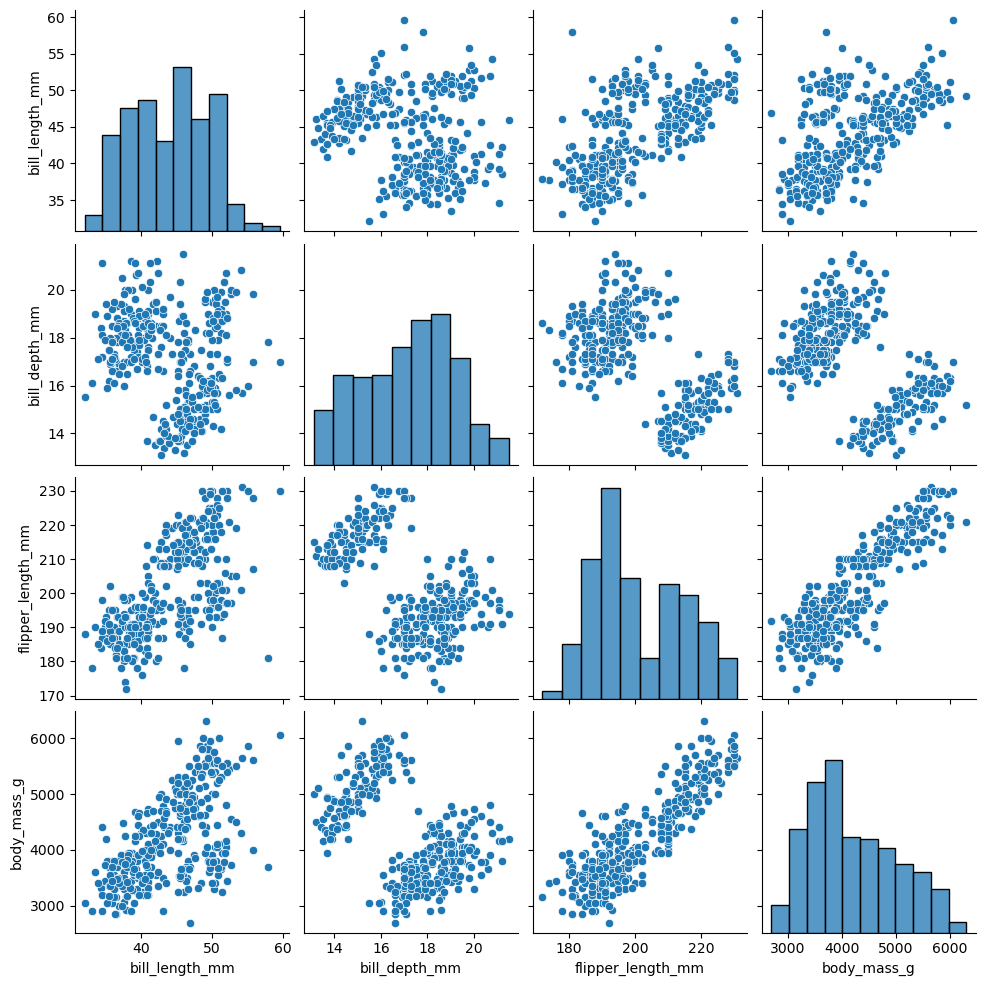

In [153]:
sns.pairplot(data=penguins);

Looking at all those scatterplots, it seems like there's some pattern here - the penguins seem to be grouped into 2 or 3 clusters. Hmm...


We're going to apply the **k-means clustering** to put the penguins into three groups based on their mutual similarity. I've hidden away the inner workings inside `cluster_demo_fit` and `cluster_demo_vis` - for now, the goal is simply to see the result of a clustering algorithm, not understand how it works (we'll get there soon!).

In [154]:
# ignore this code for now!
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score

def cluster_demo_fit(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=42)
    y_pred = kmeans.fit_predict(X_scaled)
    return y_pred

def cluster_demo_vis(df, x_col, y_col):
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    
    # Left Plot: True Species Labels
    sns.scatterplot( data=df, x=x_col, y=y_col, hue='species', palette='viridis', ax=axes[0], s=20, alpha=0.8)
    axes[0].set_title('Ground Truth (Actual Species)')
    axes[0].legend(title='Species')
    
    # Right Plot: Predicted Cluster Labels
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='cluster', palette='Set1', ax=axes[1], s=20, alpha=0.8, legend='full')
    axes[1].set_title(f'K-Means Clusters (K=3)')
    axes[1].legend(title='Cluster ID')
    
    plt.show()
    

In [156]:
# cluster_demo_fit returns a column with the cluster number for each datapoint
df['cluster'] = cluster_demo_fit(X)
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  cluster  
0         3750.0    Male        0  
1         3800.0  Female        0  
2         3250.0  Female        0  
4         3450.0  Female        0  
5         3650.0    Male        0  
..           ...     ...      ...  
338       4925.0  Female        1  
340       4850.0  Female        1  
341       5750.0    Male        1  
342       5200.0  Female        1  
343       5400.0    Male        1  

[333 rows x 8 columns]

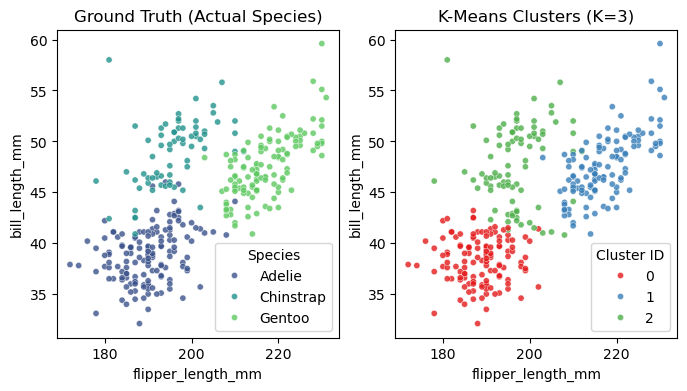

In [157]:
# choose 2 axes to visualize along
x_col = 'flipper_length_mm'
y_col = 'bill_length_mm'

cluster_demo_vis(df, x_col, y_col)

<Axes: xlabel='cluster', ylabel='species'>

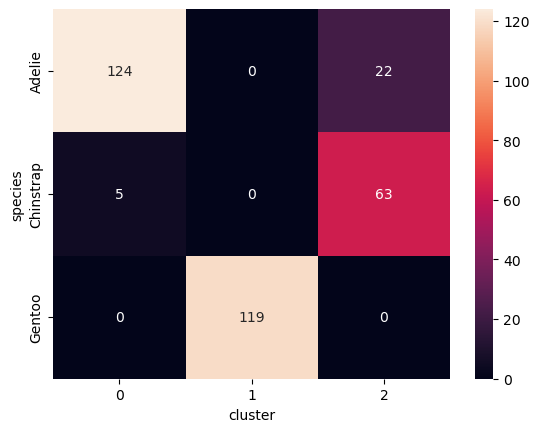

In [161]:
# Confusion matrix showing cluster assignment vs species
comparison_table = pd.crosstab(df['species'], df['cluster'])
sns.heatmap(comparison_table, annot=True, fmt='g')

In [168]:
# again, ignore the code!

from sklearn.random_projection import GaussianRandomProjection
df = penguins.copy(deep=True)

def dim_reduction_demo(X):
    scaler = StandardScaler()
    n_components = 2
    rp = GaussianRandomProjection(n_components=n_components)
    X_proj = rp.fit_transform(X_scaled)
    return X_proj



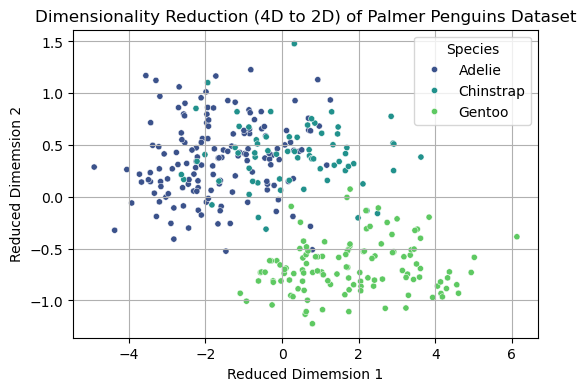

In [169]:
df[["D1", "D2"]] = dim_reduction_demo(X)

plt.figure(figsize=(6, 4))
sns.scatterplot(x='D1', y='D2', hue='species', data=df, palette='viridis', s=20)

plt.title('Dimensionality Reduction (4D to 2D) of Palmer Penguins Dataset')
plt.xlabel(f'Reduced Dimemsion 1')
plt.ylabel(f'Reduced Dimemsion 2')
plt.grid(True)
plt.legend(title='Species')
plt.show()

## Distance Metrics

All of the above methods require the fundamental ability to **compare datapoints**, in particular to answer the question: how similar or different are they?

#### $L^p$ Distances
A common family of distance metrics is the $L^p$ distance:

$$d_p(a, b) = \sqrt[p]{\sum_{i=1}^d |a_i - b_i|^p}$$

When $p = 2$, this is the Euclidean distance we're all used to, based on the Pythagorean theorem; in 2D, it reduces to: $$\sqrt{(b_x - a_x)^2 + (b_y - a_y^2)}$$

Different values of $p$ give different behavior: 
* For smaller $p$, we care less about how different the per-dimension differences are from each other.
* For larger $p$, we care more about how different the per-dimension differences are from each other.

A few examples of the "unit circle" under different $L^p$ distances:
![](https://fw.cs.wwu.edu/~wehrwes/courses/data311_23w/lectures/L19/lp_distances.png)

$L_1$ and $L_2$ are by far the most common choices here.

**Exercise:** rank the penguins by similarity to Penguin 0, based on L1, L2, distance between flipper + bill length vectors. 

In [170]:
penguins.iloc[0:1,:]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   

   body_mass_g   sex  
0       3750.0  Male

Start by writing a function to compute $L^p$ distance between two vectors:

In [182]:
def L(p, a, b):
    """ Compute the L^p distance between vectors a and b
    Pre: p > 0 and a, b are d-dimensional 1d arrays """
    return np.sum(np.abs(a - b) ** p) ** (1/p)
L(2, np.array([1, 1]), np.array([2,2]))
# penguin_0 = penguins.iloc[0][numerical_features]

np.float64(1.4142135623730951)

Now create a new column in `penguins` with the $L^2$ distance to penguin 0:

In [187]:
penguins["L1"] = penguins[numerical_features].apply(lambda b: L(1, penguin_0, b[numerical_features]), axis=1)

In [191]:
#sns.pairplot(data=penguins)

Complete a similar process for L^1 distance.

## More Distance Metrics

#### Hamming Distance

For vectors of categorical values, Hamming distance is the number of dimensions in which two vectors differ: 
$$d(a, b) = \sum_i \mathbb{1}(a_i \ne b_i)$$
where $\mathbb{1}(\cdot)$ is an indicator function that has value 1 if its argument is true and 0 otherwise.

#### Cosine Similarity

A similarity (not distance) metric that considers only vector direction, not magnitude:

$$ sim(a, b) = \cos \theta = \frac{a^Tb}{\sqrt{(a^Ta)(b^Tb)}}$$

